In [1]:
import os
from PIL import Image
from glob import glob
import matplotlib.pyplot as plt
import numpy as np

# keras_ocr
import keras_ocr

# 테서랙트
import pytesseract
from pytesseract import Output


In [2]:
path = './images'
img_path = glob(path+'/*')

print(img_path)

['./images/data (9).jpg', './images/data (6).jpg', './images/data (1).jpg', './images/data (8).jpg', './images/data (2).jpg', './images/data (3).jpg', './images/data (7).jpg', './images/data (10).jpg', './images/data (4).jpg', './images/data (5).jpg']


In [3]:
print(img_path)
print(len(img_path))

['./images/data (9).jpg', './images/data (6).jpg', './images/data (1).jpg', './images/data (8).jpg', './images/data (2).jpg', './images/data (3).jpg', './images/data (7).jpg', './images/data (10).jpg', './images/data (4).jpg', './images/data (5).jpg']
10


In [4]:
import matplotlib.pyplot as plt
import keras_ocr

# keras-ocr이 detector과 recognizer를 위한 모델을 자동으로 다운로드받게 됩니다. 
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /aiffel/.keras-ocr/craft_mlt_25k.h5
Looking for /aiffel/.keras-ocr/crnn_kurapan.h5


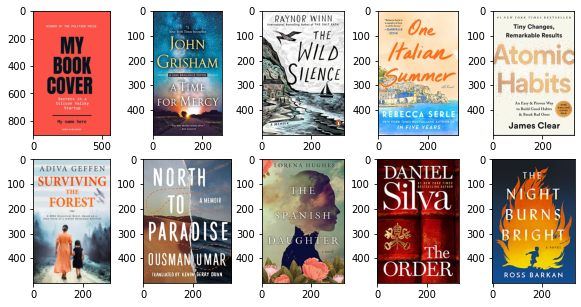

In [5]:
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    pil_img = Image.open(img_path[i])
    plt.imshow(pil_img)
plt.show()

Looking for /aiffel/.keras-ocr/craft_mlt_25k.h5
Looking for /aiffel/.keras-ocr/crnn_kurapan.h5


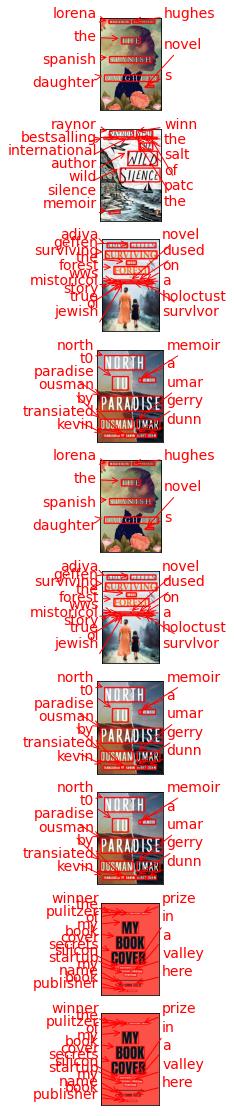

In [6]:
# keras-ocr이 detector과 recognizer를 위한 모델을 자동으로 다운로드받게 됩니다. 
pipeline = keras_ocr.pipeline.Pipeline()

random_idx = np.random.choice(np.arange(len(img_path)), 10) # random choice

image_path = []
for i in random_idx :
    image_path.append(img_path[i])

images = [ keras_ocr.tools.read(path) for path in image_path]
prediction_groups = [pipeline.recognize([path]) for path in image_path]

fig, axs = plt.subplots(nrows=len(images), figsize=(20, 20))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)

In [7]:
def crop_word_regions(image_path='./images/sample.png', output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='eng',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
            print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return cropped_image_path_list

In [8]:
work_dir = os.getenv('HOME')+'/aiffel/ocr_python/ocr_python'
#테스트용 이미지 경로입니다. 본인이 선택한 파일명으로 바꿔주세요. 

random_idx = np.random.choice(np.arange(len(img_path)), 5) #random choice 3 image
cropped_image_path_list = []
for i in random_idx :
    img_file_path = img_path[i]
    if not os.path.exists(os.path.join(work_dir, f'result_image_{i}')) :
        os.makedirs(os.path.join(work_dir, f'result_image_{i}'))
    
    temp = crop_word_regions(img_file_path, os.path.join(work_dir, f'result_image_{i}'))
    cropped_image_path_list.extend(temp)

/aiffel/aiffel/ocr_python/ocr_python/result_image_2/0000.png
/aiffel/aiffel/ocr_python/ocr_python/result_image_2/0001.png
/aiffel/aiffel/ocr_python/ocr_python/result_image_2/0002.png
/aiffel/aiffel/ocr_python/ocr_python/result_image_2/0003.png
/aiffel/aiffel/ocr_python/ocr_python/result_image_2/0004.png
/aiffel/aiffel/ocr_python/ocr_python/result_image_2/0005.png
/aiffel/aiffel/ocr_python/ocr_python/result_image_2/0006.png
/aiffel/aiffel/ocr_python/ocr_python/result_image_2/0007.png
/aiffel/aiffel/ocr_python/ocr_python/result_image_2/0008.png
/aiffel/aiffel/ocr_python/ocr_python/result_image_8/0000.png
/aiffel/aiffel/ocr_python/ocr_python/result_image_8/0001.png
/aiffel/aiffel/ocr_python/ocr_python/result_image_8/0002.png
/aiffel/aiffel/ocr_python/ocr_python/result_image_8/0003.png
/aiffel/aiffel/ocr_python/ocr_python/result_image_8/0004.png
/aiffel/aiffel/ocr_python/ocr_python/result_image_8/0005.png
/aiffel/aiffel/ocr_python/ocr_python/result_image_8/0006.png
/aiffel/aiffel/ocr_pytho

In [9]:
def recognize_images(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='eng',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print("Done")

In [10]:
random_idx = np.random.choice(np.arange(len(cropped_image_path_list)), 5, replace=False)

cropped_image_pahts = []
for idx in random_idx:
    cropped_image_pahts.append(cropped_image_path_list[idx])
cropped_image_pahts

['/aiffel/aiffel/ocr_python/ocr_python/result_image_5/0000.png',
 '/aiffel/aiffel/ocr_python/ocr_python/result_image_6/0000.png',
 '/aiffel/aiffel/ocr_python/ocr_python/result_image_7/0001.png',
 '/aiffel/aiffel/ocr_python/ocr_python/result_image_6/0001.png',
 '/aiffel/aiffel/ocr_python/ocr_python/result_image_8/0000.png']

In [11]:
# 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.
recognize_images(cropped_image_pahts)

ADIVA

ot hen

HUGHES


ENN

Done


ADIVA

Done


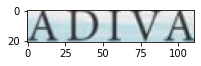

ot hen

Done


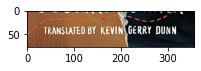

HUGHES

Done


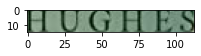

In [12]:
for i in range(3) :
    plt.figure(figsize = (3, 3))
    pil_img = Image.open(cropped_image_pahts[i])
    recognize_images([cropped_image_pahts[i]])
    plt.imshow(pil_img)
    plt.show()

# Step3. 테스트 결과 정리

# Step4. 결과 분석과 결론 제시
우선 여러분들이 구현하고자 하는 서비스의 목적과 내용을 먼저 정리합니다. 여러분들이 검토한 OCR 모델들이 그 목적에 부합하는지 확인하기 위해 필요한 평가 기준을 제시합니다. 그 기준에 따라 위에서 정리한 테스트 결과를 분석하여 가장 나은 대안의 모델을 선정합니다.



- 책 표지들의 출처는 Amazon이다. Best Seller인 책들로 구성되었고, E-book이 존재하는 책이었다. 그래서 문서를 디지털로 처리하는 과정하는 과정에서 발생하는 노이즈나 왜곡의 문제는 발생하지 않았다. ( 이 문제는 전처리 과정을 통해서 문제를 개선할 수 있다.)
- 텍스트 영역이 기울어진 정도가 인식에 영향을 줄 수도 있지만, 책 표지의 특성 상 기울어진 글자가 거의 없어 관련 오류가 발생하지 않았고, 그나마 기울어져있는 'The'도 올바르게 인식되었다. 
- 다양한 색과 글씨체, 배경을 가진 이미지를 사용했다. 정자체일수록 인식률이 높고, 필기체일수록 인식률이 낮다고 한다. 하지만, 내가 사용한 이미지에서는 글자의 크기가 작은 경우에 잘못 인식하는 확률이 높았다. 또한, "TO"에서 알파벳 O를 숫자 0 으로 인식한 결과도 있다. 이처럼 비슷하게 생긴 알파벳의 경우는 전처리/후처리를 통해서 오류를 잡아야한다. 
- 여기서 후처리가 제대로 진행되지 않았기 때문에 이와 같은 오류가 발생한 것으로 보인다. 
- 또한, 다양하고 충분한 양의 데이터를 학습하면 다양한 필체를 인식하고, 문맥을 파악하는 기술을 통해서 기존의 오류가 보완이 가능할 것으로 보인다. 

- 무작정 해상도를 높인다고 문제가 해결되는 것은 아니다. 이미지 파일의 크기가 커져서 더 많은 저장 공간이 필요하고, 이미지를 처리하는 시스템의 성능이 좋아져야한다. 또한, 위에서 말한 것처럼 비슷하게 생긴 문자들을 구분할 수 없다면, 내용의 오류는 개선되지 않는다. 

---

- 의문 : 알파벳 6개가 놓여 있는 상황이 있다. 당연히 글씨체는 동일하고 배경도 동일하다. 그런데 텍스트 영역은 가운데 4개의 알파벳만 인식했다. 문제가 무엇일까..?
- 추측 : 이 경우는 One-to-Many 문제라고 한다. (하나의 정답 박스가 여러 개의 박스로 나뉘어 예측되는 경우, Split)



+ 참고 
https://deview.kr/data/deview/2019/presentation/[123]%EB%AC%B8%EC%9E%90%EC%9D%B8%EC%8B%9D(OCR),+%EC%96%BC%EB%A7%88%EB%82%98+%EC%A0%95%ED%99%95%ED%95%98%EC%A7%80+(%EB%AC%B8%EC%9E%90%EC%9D%B8%EC%8B%9D+%EC%84%B1%EB%8A%A5%EC%9D%84+%EC%A0%95%ED%99%95%ED%95%98%EA%B2%8C+%EC%B8%A1%EC%A0%95%ED%95%98%EB%8A%94+%EB%B0%A9%EB%B2%95).pdf